In [23]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D , GlobalAveragePooling2D, concatenate, Input
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [24]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)
# img = cv2.imread('./ImagesDataset/Test/BlackWhip/BlackWhipTest (12).jpg')
# img
# img = cv2.imread(img , cv2.COLOR_BGR2RGB)

# # cv2.imshow(img)
# # rawImgs.append(img)

# # Load the image
# img = cv2.imread('./ImagesDataset/Test/BlackWhip/BlackWhipTest (12).jpg')

# # Flip the image horizontally
# flipped_img = cv2.flip(img, 1)
# img = cv2.resize(img ,(width,width))
# flipped_imgresize = cv2.resize(flipped_img ,(width,width))

# # Show the original and flipped images
# cv2.imshow('Original Image', img)
# cv2.imshow('Flipped Image', flipped_imgresize)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

['./ImagesDataset/Train/BlackDot', './ImagesDataset/Train/BlackWhip', './ImagesDataset/Train/LeafBurn', './ImagesDataset/Train/RedLine', './ImagesDataset/Train/RingLeaf', './ImagesDataset/Train/RustMold', './ImagesDataset/Train/StreakMosaic', './ImagesDataset/Train/YellowLeaf']
['./ImagesDataset/Test/BlackDot', './ImagesDataset/Test/BlackWhip', './ImagesDataset/Test/LeafBurn', './ImagesDataset/Test/RedLine', './ImagesDataset/Test/RingLeaf', './ImagesDataset/Test/RustMold', './ImagesDataset/Test/StreakMosaic', './ImagesDataset/Test/YellowLeaf']


In [25]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3]
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 100/100 [00:17<00:00,  5.69it/s]


In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

# ฟังก์ชันแปลง array 2d เป็น array 1d เพื่อแปลงค่า label ให้เป็นตัวเลข 0-7
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

# สร้าง array ขนาด 800 ตัวเลข 0 เพื่อเก็บค่า label จริง
true_labels = np.zeros(800, dtype=int)
for i in range(8):
    true_labels[i*100:(i+1)*100] = i
# Print the array
# print(len(true_labels))

AlexNet

Epoch 1/10
100/100 [==============================] - 56s 537ms/step - loss: 1.3865 - accuracy: 0.7344 - val_loss: 13.9654 - val_accuracy: 0.1425
Epoch 2/10
100/100 [==============================] - 54s 537ms/step - loss: 0.3670 - accuracy: 0.9125 - val_loss: 6.0105 - val_accuracy: 0.2800
Epoch 3/10
100/100 [==============================] - 54s 538ms/step - loss: 0.3069 - accuracy: 0.9325 - val_loss: 7.7360 - val_accuracy: 0.2237
Epoch 4/10
100/100 [==============================] - 54s 540ms/step - loss: 0.2284 - accuracy: 0.9494 - val_loss: 46.0956 - val_accuracy: 0.1287
Epoch 5/10
100/100 [==============================] - 54s 542ms/step - loss: 0.3049 - accuracy: 0.9403 - val_loss: 21.2950 - val_accuracy: 0.2050
Epoch 6/10
100/100 [==============================] - 54s 541ms/step - loss: 0.4486 - accuracy: 0.9328 - val_loss: 39.9353 - val_accuracy: 0.3363
Epoch 7/10
100/100 [==============================] - 54s 541ms/step - loss: 0.1172 - accuracy: 0.9712 - val_loss: 6.1554 - va

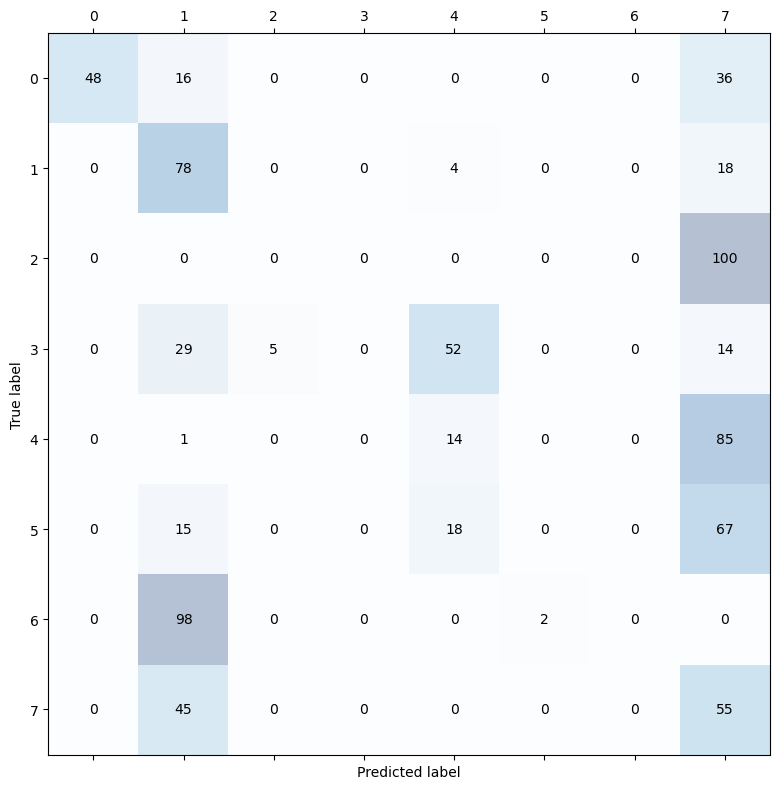

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       100
           1       0.28      0.78      0.41       100
           2       0.00      0.00      0.00       100
           3       1.00      0.00      0.00       100
           4       0.16      0.14      0.15       100
           5       0.00      0.00      0.00       100
           6       1.00      0.00      0.00       100
           7       0.15      0.55      0.23       100

    accuracy                           0.24       800
   macro avg       0.45      0.24      0.18       800
weighted avg       0.45      0.24      0.18       800



Text(0.5, 1.0, 'Confusion Matrix')

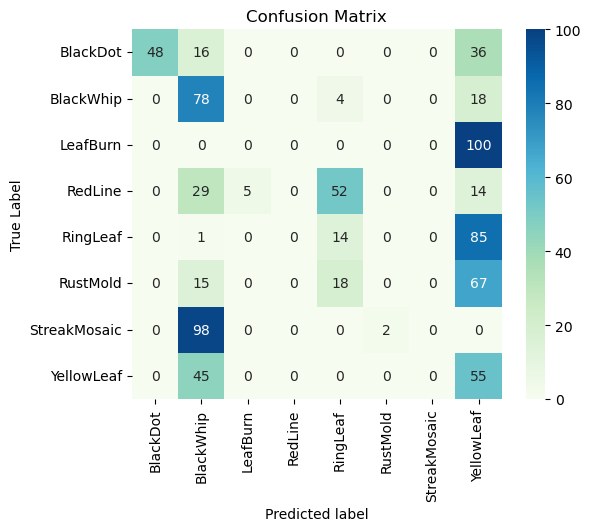

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

# AlexNet_Model = Sequential()
# AlexNet_Model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid', input_shape=(128,128,3)))
# AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
# AlexNet_Model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
# AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
# AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
# AlexNet_Model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
# AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
# AlexNet_Model.add(Flatten())
# AlexNet_Model.add(Dense(4096, activation='sigmoid'))
# # AlexNet_Model.add(Dense(4096, activation='relu'))
# AlexNet_Model.add(Dense(8, activation='softmax'))

def alexnet(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        # Convolutional layers
        tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.BatchNormalization(),
        
        # Flatten layer
        tf.keras.layers.Flatten(),
        
        # Fully connected layers
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

AlexNet_Model = alexnet((128,128,3), 8)
AlexNet_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
AlexNet_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
AlexNet_ModelPred = AlexNet_Model.predict(x_test)
AlexNet_ModelPred = np.argmax(AlexNet_ModelPred ,axis=1)
# print(len(AlexNet_ModelPred))
# print(AlexNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
AlexNet_ModelPredLabel = convert_to_1d_array(AlexNet_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
AlexNetconfusion_matrix = confusion_matrix(true_labels, AlexNet_ModelPredLabel)
# Accuracy_score
AlexNetaccuracy_score = accuracy_score(true_labels, AlexNet_ModelPredLabel)
# Recall_score
AlexNetrecall_score = recall_score(true_labels, AlexNet_ModelPredLabel, average='macro')
# resaultPredict
AlexNetf1_score = f1_score(true_labels, AlexNet_ModelPredLabel, average='macro' )
# Classification_report
AlexNetlassification_report = classification_report(true_labels, AlexNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(AlexNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(AlexNetconfusion_matrix.shape[0]):
    for j in range(AlexNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=AlexNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(AlexNetlassification_report)

# confusionmatrix
axes = sns.heatmap(AlexNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

MobilenetV2

In [28]:
# โหลด MobilenetV2 model มาจาก tensorflow hub
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False, weights='imagenet')
mobilenetModel.trainable = False

# สร้าง model ใหม่ โดยเพิ่ม layer ต่อจาก model ที่โหลดมา
mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(MaxPool2D(2))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(8, activation='softmax'))

# กำหนดตัวแปรในการ train model
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy'])
mobilenetModelModify.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
mobilenetPred = mobilenetModelModify.predict(x_test)
mobilenetPred = np.argmax(mobilenetPred ,axis=1)
# print(len(y_pred))
# print(y_pred)

Epoch 1/10
100/100 [==============================] - 28s 257ms/step - loss: 1.1756 - accuracy: 0.8850 - val_loss: 0.2402 - val_accuracy: 0.8800
Epoch 2/10
100/100 [==============================] - 25s 247ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.2640 - val_accuracy: 0.8813
Epoch 3/10
100/100 [==============================] - 25s 252ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.2087 - val_accuracy: 0.9438
Epoch 4/10
100/100 [==============================] - 25s 249ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2591 - val_accuracy: 0.9300
Epoch 5/10
100/100 [==============================] - 25s 250ms/step - loss: 6.8936e-04 - accuracy: 1.0000 - val_loss: 0.2514 - val_accuracy: 0.9225
Epoch 6/10
100/100 [==============================] - 25s 249ms/step - loss: 4.9445e-04 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 0.9225
Epoch 7/10
100/100 [==============================] - 25s 249ms/step - loss: 3.7007e-04 - accuracy: 1.0000 - val_loss: 0.2

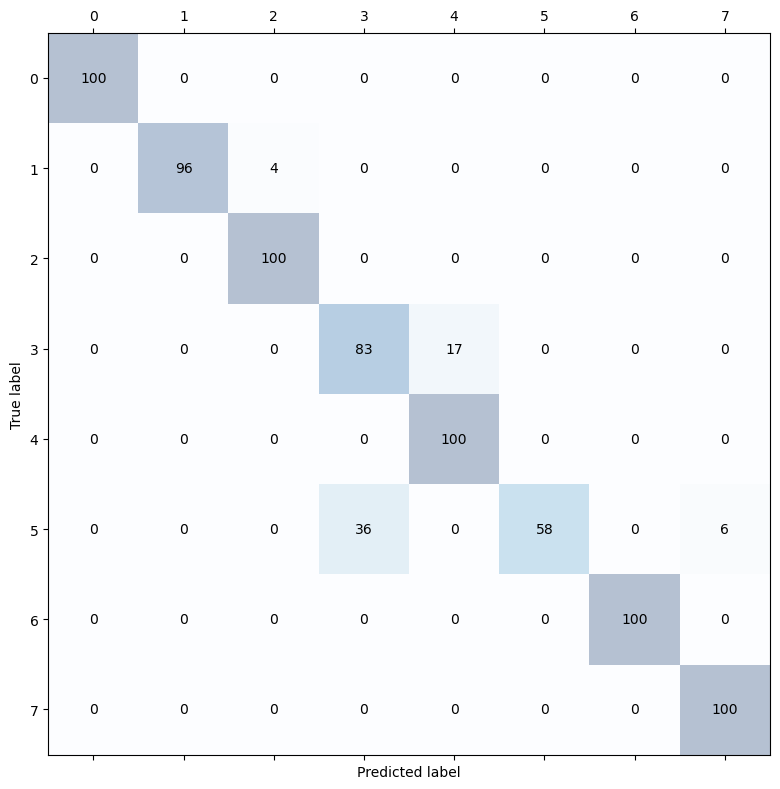

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.96      0.98       100
           2       0.96      1.00      0.98       100
           3       0.70      0.83      0.76       100
           4       0.85      1.00      0.92       100
           5       1.00      0.58      0.73       100
           6       1.00      1.00      1.00       100
           7       0.94      1.00      0.97       100

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800



Text(0.5, 1.0, 'Confusion Matrix')

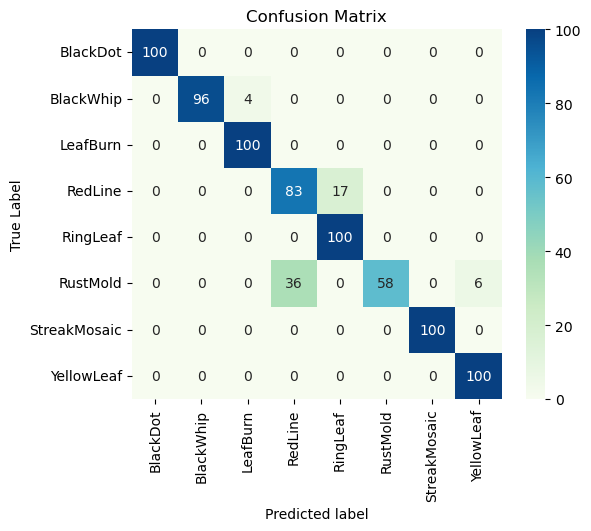

In [29]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report, roc_curve, roc_auc_score

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
mobilenetPredictLabels = convert_to_1d_array(mobilenetPred)
# print(resaultPredictLabels)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
mobilenetconfusion_matrix = confusion_matrix(true_labels, mobilenetPredictLabels)
# Accuracy_score
mobilenetaccuracy_score = accuracy_score(true_labels, mobilenetPredictLabels)
# Recall_score
mobilenetrecall_score = recall_score(true_labels, mobilenetPredictLabels, average='macro')
# resaultPredict
mobilenetf1_score = f1_score(true_labels, mobilenetPredictLabels, average='macro')
# Classification_report
mobilenetclassification_report = classification_report(true_labels, mobilenetPredictLabels)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(mobilenetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(mobilenetconfusion_matrix.shape[0]):
    for j in range(mobilenetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=mobilenetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(mobilenetclassification_report)

# confusionmatrix
axes = sns.heatmap(mobilenetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

# mobilenetModelModify.save("mymodel")



25/25 [==============================] - 4s 174ms/step


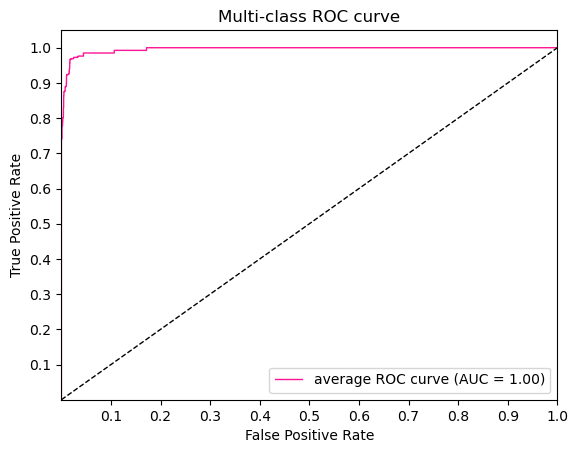

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = mobilenetModelModify.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

# plt.figure(figsize=(8, 6))
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()

LeNet-5

Epoch 1/10
100/100 [==============================] - 42s 413ms/step - loss: 1.0087 - accuracy: 0.6578 - val_loss: 0.7546 - val_accuracy: 0.8050
Epoch 2/10
100/100 [==============================] - 41s 406ms/step - loss: 0.1307 - accuracy: 0.9650 - val_loss: 0.8573 - val_accuracy: 0.7925
Epoch 3/10
100/100 [==============================] - 41s 408ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.7646 - val_accuracy: 0.8338
Epoch 4/10
100/100 [==============================] - 41s 408ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.8520 - val_accuracy: 0.8350
Epoch 5/10
100/100 [==============================] - 41s 407ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.9194 - val_accuracy: 0.8313
Epoch 6/10
100/100 [==============================] - 41s 408ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 1.0902 - val_accuracy: 0.7875
Epoch 7/10
100/100 [==============================] - 41s 408ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 1.4090 - val_ac

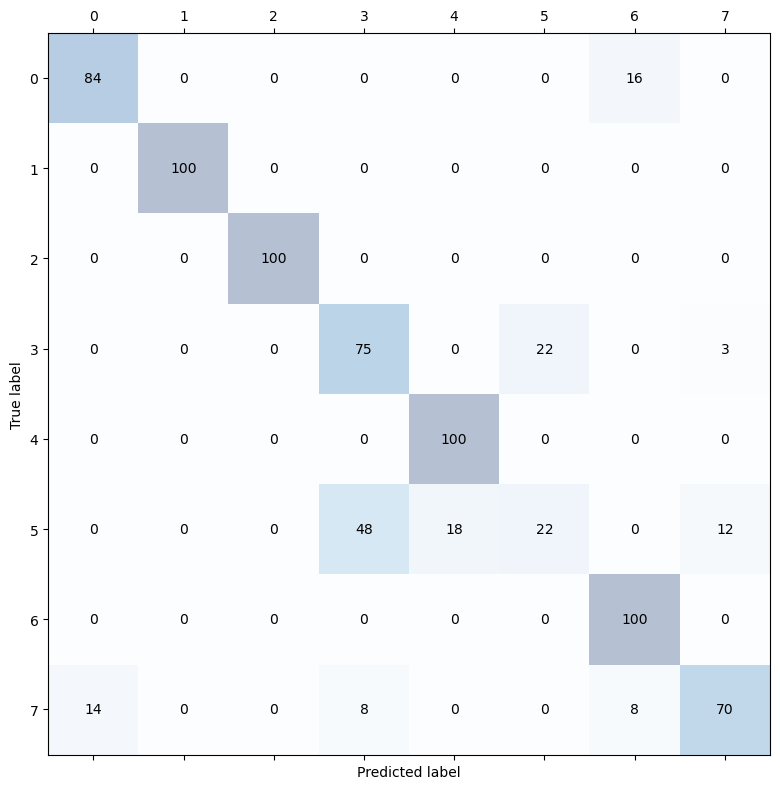

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.57      0.75      0.65       100
           4       0.85      1.00      0.92       100
           5       0.50      0.22      0.31       100
           6       0.81      1.00      0.89       100
           7       0.82      0.70      0.76       100

    accuracy                           0.81       800
   macro avg       0.80      0.81      0.80       800
weighted avg       0.80      0.81      0.80       800



Text(0.5, 1.0, 'Confusion Matrix')

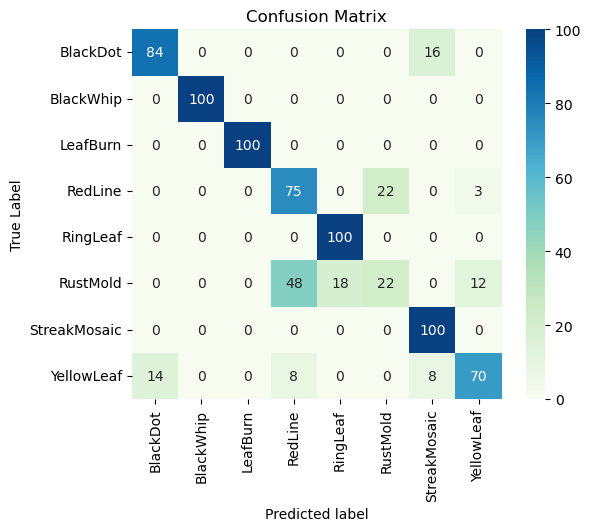

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

LeNet_5_Model = Sequential()
LeNet_5_Model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Flatten())
LeNet_5_Model.add(Dense(256, activation='relu'))
LeNet_5_Model.add(Dense(84, activation='relu'))
LeNet_5_Model.add(Dense(8, activation='softmax'))

LeNet_5_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet_5_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
LeNet_5_ModelPred = LeNet_5_Model.predict(x_test)
LeNet_5_ModelPred = np.argmax(LeNet_5_ModelPred ,axis=1)
# print(len(LeNet_5_ModelPred))
# print(LeNet_5_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
LeNet_5_ModelPredLabel = convert_to_1d_array(LeNet_5_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
LeNet_confusion_matrix = confusion_matrix(true_labels, LeNet_5_ModelPredLabel)
# Accuracy_score
LeNet_accuracy_score = accuracy_score(true_labels, LeNet_5_ModelPredLabel)
# Recall_score
LeNet_recall_score = recall_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# resaultPredict
LeNet_f1_score = f1_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# Classification_report
LeNet_classification_report = classification_report(true_labels, LeNet_5_ModelPredLabel)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(LeNet_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LeNet_confusion_matrix.shape[0]):
    for j in range(LeNet_confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=LeNet_confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(LeNet_classification_report)

# confusionmatrix
axes = sns.heatmap(LeNet_confusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')



Inception

Epoch 1/10
100/100 [==============================] - 78s 769ms/step - loss: 1.8971 - accuracy: 0.2566 - val_loss: 1.5252 - val_accuracy: 0.4100
Epoch 2/10
100/100 [==============================] - 76s 765ms/step - loss: 1.3181 - accuracy: 0.5025 - val_loss: 1.2261 - val_accuracy: 0.4675
Epoch 3/10
100/100 [==============================] - 77s 767ms/step - loss: 1.1083 - accuracy: 0.5966 - val_loss: 1.1974 - val_accuracy: 0.6037
Epoch 4/10
100/100 [==============================] - 77s 768ms/step - loss: 0.7917 - accuracy: 0.7184 - val_loss: 1.0493 - val_accuracy: 0.5250
Epoch 5/10
100/100 [==============================] - 76s 765ms/step - loss: 0.6790 - accuracy: 0.7597 - val_loss: 1.1178 - val_accuracy: 0.5863
Epoch 6/10
100/100 [==============================] - 77s 767ms/step - loss: 0.5566 - accuracy: 0.8041 - val_loss: 0.9879 - val_accuracy: 0.7212
Epoch 7/10
100/100 [==============================] - 77s 767ms/step - loss: 0.4801 - accuracy: 0.8369 - val_loss: 0.9802 - val_ac

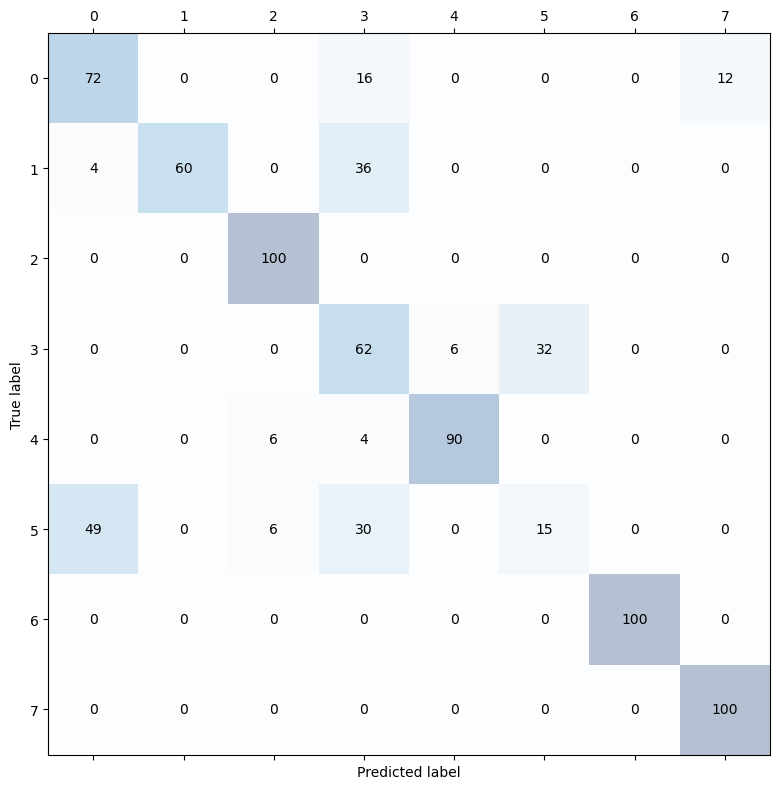

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       100
           1       1.00      0.60      0.75       100
           2       0.89      1.00      0.94       100
           3       0.42      0.62      0.50       100
           4       0.94      0.90      0.92       100
           5       0.32      0.15      0.20       100
           6       1.00      1.00      1.00       100
           7       0.89      1.00      0.94       100

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.74       800
weighted avg       0.75      0.75      0.74       800



Text(0.5, 1.0, 'Confusion Matrix')

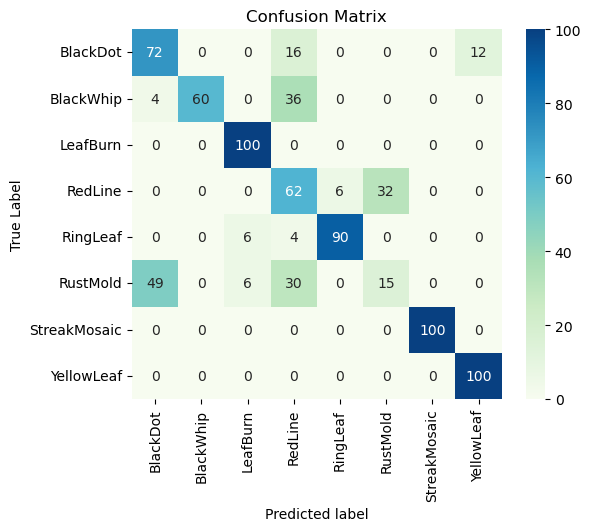

In [32]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report
def InceptionV3(input_shape=(128, 128, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((3, 3)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))

    return model

inceptionModel = InceptionV3()
# inceptionModel.summary()

inceptionModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
inception_ModelPred = inceptionModel.predict(x_test)
inception_ModelPred = np.argmax(inception_ModelPred ,axis=1)
# print(len(inception_ModelPred))
# print(inception_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
inception_ModelPredLabel = convert_to_1d_array(inception_ModelPred)
# print(inception_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
inceptionconfusion_matrix = confusion_matrix(true_labels, inception_ModelPredLabel)
# Accuracy_score
inceptionaccuracy_score = accuracy_score(true_labels, inception_ModelPredLabel)
# Recall_score
inceptionrecall_score = recall_score(true_labels, inception_ModelPredLabel, average='macro')
# resaultPredict
inceptionf1_score = f1_score(true_labels, inception_ModelPredLabel, average='macro' )
# Classification_report
inceptionclassification_report = classification_report(true_labels, inception_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(inceptionconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(inceptionconfusion_matrix.shape[0]):
    for j in range(inceptionconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=inceptionconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(inceptionclassification_report)

# confusionmatrix
axes = sns.heatmap(inceptionconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

ResNet

Epoch 1/10
100/100 [==============================] - 66s 617ms/step - loss: 0.2762 - accuracy: 0.9128 - val_loss: 14.1798 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - 61s 612ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 10.7158 - val_accuracy: 0.2800
Epoch 3/10
100/100 [==============================] - 61s 614ms/step - loss: 0.0542 - accuracy: 0.9812 - val_loss: 7.1394 - val_accuracy: 0.3338
Epoch 4/10
100/100 [==============================] - 62s 617ms/step - loss: 0.0459 - accuracy: 0.9878 - val_loss: 6.7794 - val_accuracy: 0.2537
Epoch 5/10
100/100 [==============================] - 62s 617ms/step - loss: 0.0156 - accuracy: 0.9966 - val_loss: 2.3367 - val_accuracy: 0.5250
Epoch 6/10
100/100 [==============================] - 62s 617ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 1.0993 - val_accuracy: 0.7513
Epoch 7/10
100/100 [==============================] - 63s 626ms/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 3.0753 - val_

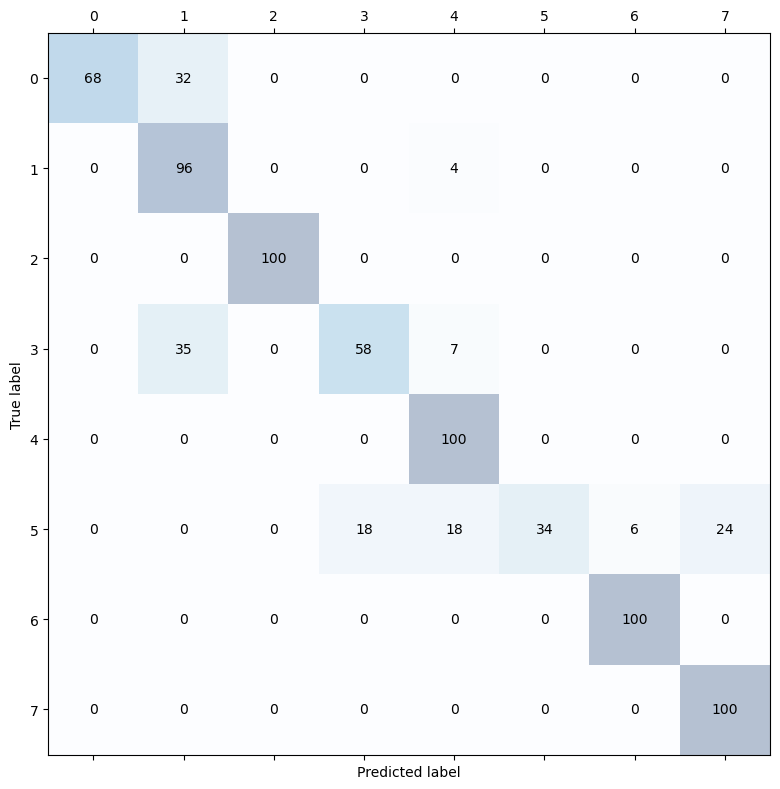

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       100
           1       0.59      0.96      0.73       100
           2       1.00      1.00      1.00       100
           3       0.76      0.58      0.66       100
           4       0.78      1.00      0.87       100
           5       1.00      0.34      0.51       100
           6       0.94      1.00      0.97       100
           7       0.81      1.00      0.89       100

    accuracy                           0.82       800
   macro avg       0.86      0.82      0.81       800
weighted avg       0.86      0.82      0.81       800



Text(0.5, 1.0, 'Confusion Matrix')

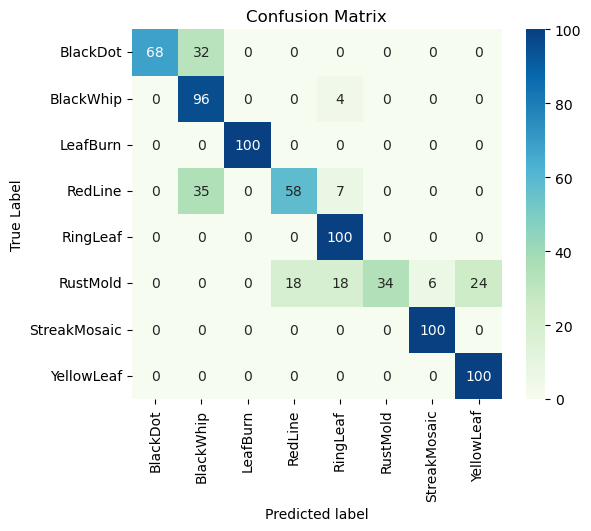

In [33]:
def residual_block(inputs, filters, strides, name):
    """A building block for a ResNet"""
    x = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same', name=name+'_conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
    x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

    x = tf.keras.layers.Conv2D(filters, 3, strides=1, padding='same', name=name+'_conv2')(x)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

    shortcut = tf.keras.layers.Conv2D(filters, 1, strides=strides, padding='same', name=name+'_shortcut')(inputs)
    shortcut = tf.keras.layers.BatchNormalization(name=name+'_shortcut_bn')(shortcut)

    x = tf.keras.layers.add([x, shortcut], name=name+'_add')
    x = tf.keras.layers.ReLU(name=name+'_relu2')(x)
    return x

def ResNet(input_shape, num_classes):
    """A simple ResNet architecture"""
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', name='conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='bn1')(x)
    x = tf.keras.layers.ReLU(name='relu1')(x)
    x = tf.keras.layers.MaxPool2D(3, strides=2, padding='same', name='maxpool')(x)

    x = residual_block(x, 64, 1, name='block1')
    x = residual_block(x, 128, 2, name='block2')
    x = residual_block(x, 256, 2, name='block3')
    x = residual_block(x, 512, 2, name='block4')

    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc')(x)

    model = tf.keras.models.Model(inputs, x, name='ResNet')
    return model

ResNetModel = ResNet((128, 128, 3), 8)
# ResNetModel.summary()

ResNetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNetModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
ResNet_ModelPred = ResNetModel.predict(x_test)
ResNet_ModelPred = np.argmax(ResNet_ModelPred ,axis=1)
# print(len(ResNet_ModelPred))
# print(ResNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
ResNet_ModelPredLabel = convert_to_1d_array(ResNet_ModelPred)
# print(ResNet_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
ResNetconfusion_matrix = confusion_matrix(true_labels, ResNet_ModelPredLabel)
# Accuracy_score
ResNetaccuracy_score = accuracy_score(true_labels, ResNet_ModelPredLabel)
# Recall_score
ResNetrecall_score = recall_score(true_labels, ResNet_ModelPredLabel, average='macro')
# resaultPredict
ResNetf1_score = f1_score(true_labels, ResNet_ModelPredLabel, average='macro' )
# Classification_report
ResNetclassification_report = classification_report(true_labels, ResNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(ResNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(ResNetconfusion_matrix.shape[0]):
    for j in range(ResNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=ResNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(ResNetaccuracy_score)
# print(ResNetrecall_score)
# print(ResNetf1_score)
print(ResNetclassification_report)

axes = sns.heatmap(ResNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

25/25 [==============================] - 5s 181ms/step


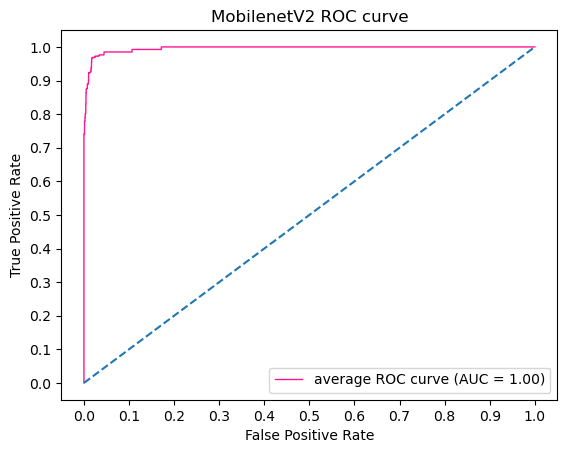

25/25 [==============================] - 2s 81ms/step


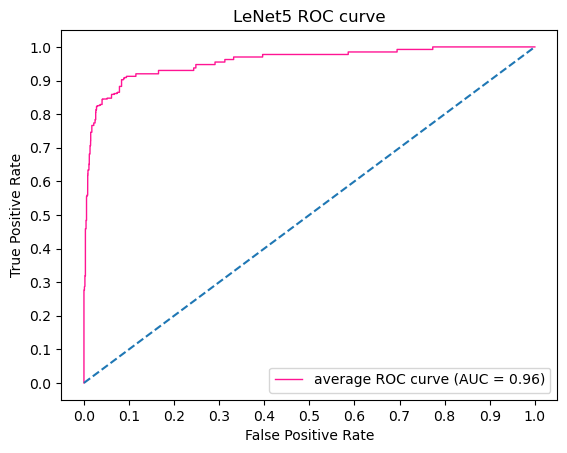

25/25 [==============================] - 2s 98ms/step


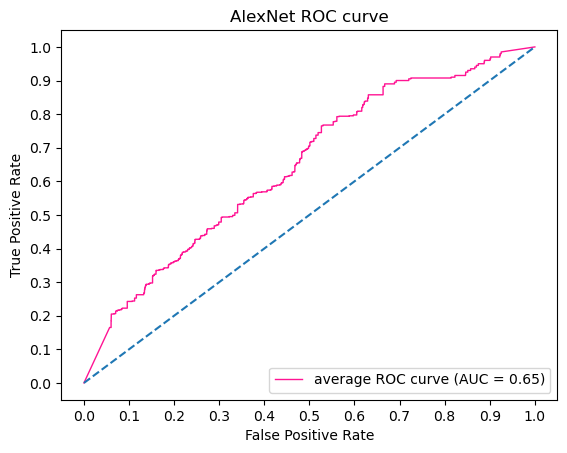

25/25 [==============================] - 4s 154ms/step


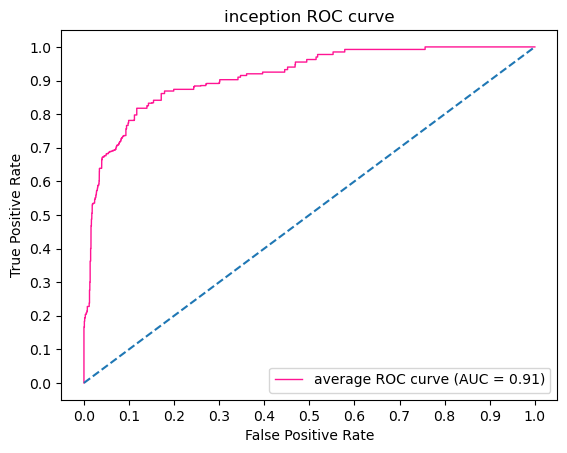

25/25 [==============================] - 3s 125ms/step


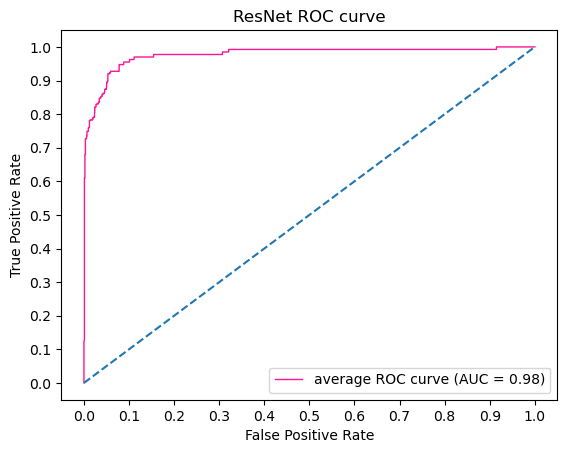

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = mobilenetModelModify.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot ([1,1],[1,1],'k--', lw=lw)
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MobilenetV2 ROC curve')
plt.legend(loc="lower right")
plt.show()

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = LeNet_5_Model.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
# lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot ([1,1],[1,1],'k--', lw=lw)
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LeNet5 ROC curve')
plt.legend(loc="lower right")
plt.show()

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = AlexNet_Model.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
# lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot ([1,1],[1,1],'k--', lw=lw)
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AlexNet ROC curve')
plt.legend(loc="lower right")
plt.show()

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = inceptionModel.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
# lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot ([1,1],[1,1],'k--', lw=lw)
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('inception ROC curve')
plt.legend(loc="lower right")
plt.show()

# Assuming you have trained your multi-class model and obtained the predicted probabilities for each sample
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = ResNetModel.predict(x_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class and the micro-average ROC curve
# plt.figure()
# lw = 1
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray']
# for i, color in zip(range(num_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# lw = 2

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))

plt.plot ([1,1],[1,1],'k--', lw=lw)
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet ROC curve')
plt.legend(loc="lower right")
plt.show()

25/25 [==============================] - 3s 123ms/step


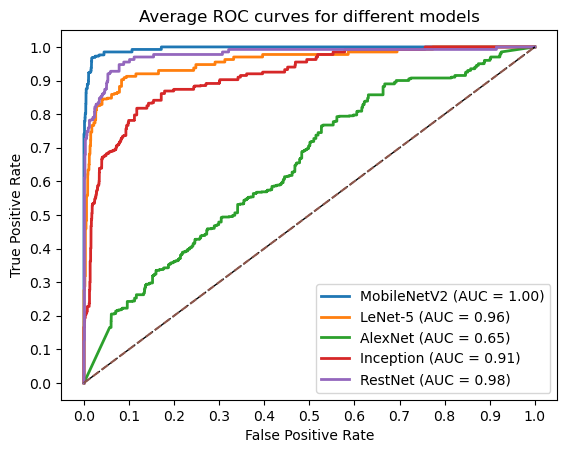

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

def plot_average_roc(y_true, y_pred, num_classes, model_name, lw=2):
    # Convert one-hot encoded labels back to integer labels
    # y_true = np.argmax(y_true, axis=1)

    # Compute the ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute the micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(to_categorical(y_true, num_classes=num_classes).ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot the average ROC curve
    plt.plot(fpr["micro"], tpr["micro"], lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(model_name, roc_auc["micro"]))

    return fpr, tpr, roc_auc

# Assuming you have trained multiple multi-class models and obtained the predicted probabilities for each sample for each model
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred_1 = mobilenetModelModify.predict(x_test)
y_pred_2 = LeNet_5_Model.predict(x_test)
y_pred_3 = AlexNet_Model.predict(x_test)
y_pred_4 = inceptionModel.predict(x_test)
y_pred_5 = ResNetModel.predict(x_test)

# Call the function for each model and dataset to obtain the ROC curve and AUC values
fpr_1, tpr_1, roc_auc_1 = plot_average_roc(y_true, y_pred_1, num_classes, 'MobileNetV2')
fpr_2, tpr_2, roc_auc_2 = plot_average_roc(y_true, y_pred_2, num_classes, 'LeNet-5')
fpr_3, tpr_3, roc_auc_3 = plot_average_roc(y_true, y_pred_3, num_classes, 'AlexNet')
fpr_4, tpr_4, roc_auc_4 = plot_average_roc(y_true, y_pred_4, num_classes, 'Inception')
fpr_5, tpr_5, roc_auc_5 = plot_average_roc(y_true, y_pred_5, num_classes, 'RestNet')

# Plot all the ROC curves on the same plot
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.plot([0,1.0], [0,1], linestyle='dashed')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC curves for different models')
plt.legend(loc="lower right")
plt.show()


In [37]:
from PIL import Image

testImgPath = './ImagesDataset/Test/StreakMosaic/StreakMosaicTest (10).jpg'
img = cv2.imread(testImgPath , cv2.COLOR_BGR2RGB)
#im_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_bgr = cv2.resize(img, (128, 128))
im_bgr = im_bgr.astype('float32')
im_bgr /= 255.00
im_bgr = np.reshape(im_bgr ,(1,128,128,3))
im_bgr

predict = mobilenetModelModify.predict(im_bgr)
label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
result = label[np.argmax(predict)]
print('Predicted : ',np.max(predict))
print(predict)
print(result)
# img = img.resize((128,128))
# im_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# rimg = cv2.resize(im_bgr, (128, 128))
# oimg = np.array(rimg)
# oimg = oimg.astype('float32')
# oimg /= 255.00
# oimg = np.reshape(oimg ,(1,128,128,3))

# imgori = Image.open(testImgPath)
# imgori = imgori.resize((128,128))
# imgori = cv2.cvtColor(np.array(imgori) , cv2.COLOR_BGR2RGB)
# rimg = np.array(imgori)
# rimg = rimg.astype('float32')
# rimg /= 255.00
# rimg = np.reshape(rimg ,(1,128,128,3))
# predict = mobilenetModelModify.predict(oimg)
# label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
# result = label[np.argmax(predict)]
# print('Predicted : ',np.max(predict))
# print(predict)
# print(result)

1/1 [==============================] - 1s 877ms/step
Predicted :  0.9973666
[[1.5336879e-06 3.8676619e-05 3.1988859e-06 4.3890238e-04 1.8572231e-03
  8.1276079e-07 9.9736661e-01 2.9298020e-04]]
StreakMosaic


In [38]:
testImgPath = './ImagesDataset/Test/StreakMosaic/StreakMosaicTest (1).jpg'
imgori = cv2.imread(testImgPath)

# imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
imgori = cv2.resize(imgori ,(128,128))
imgori.shape
# rimg = np.array(img)
# rimg = rimg.astype('float32')
# rimg /= 255.00
# rimg = np.reshape(rimg ,(1,128,128,3))
# predict = mobilenetModelModify.predict(rimg)
# label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
# result = label[np.argmax(predict)]
# print('Predicted : ',np.max(predict))
# print(predict)
# print(result)


(128, 128, 3)